# Boosting task

Make a copy of this colab file and follow the instructions to complete the task. You are expected to complete the entire task and it would be appreciated if you did more than what is aksed from you.


ALL THE BEST!

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import xgboost as xgb


colour = sns.color_palette()

Reading and converting data into a date-time format

In [3]:
df = pd.read_csv('AEP_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


Plot the data:

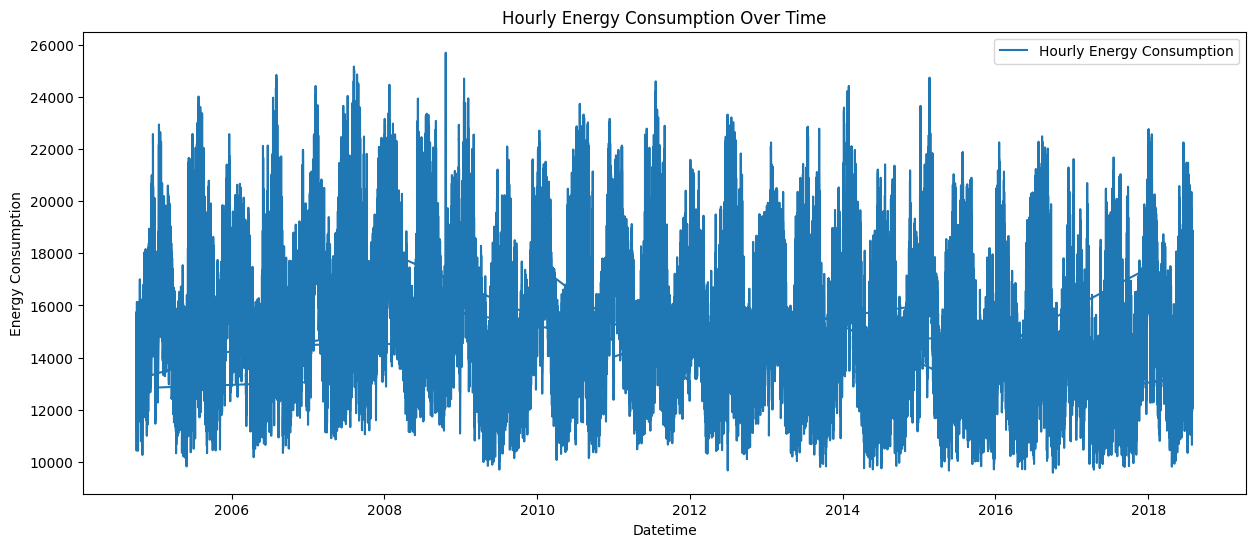

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['AEP_MW'], label='Hourly Energy Consumption')
plt.title('Hourly Energy Consumption Over Time')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()


## Data splitting

Split the data into training and testing data, split data at 01-01-2016

In [6]:
split_date = '2016-01-01'
train_data = df[df.index < split_date]
test_data = df[df.index >= split_date]

# Display the shapes of the training and testing sets
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)


Training Data Shape: (98593, 1)
Testing Data Shape: (22680, 1)


Plot data for a random week AND day, to visualize weekly and daily variations in data

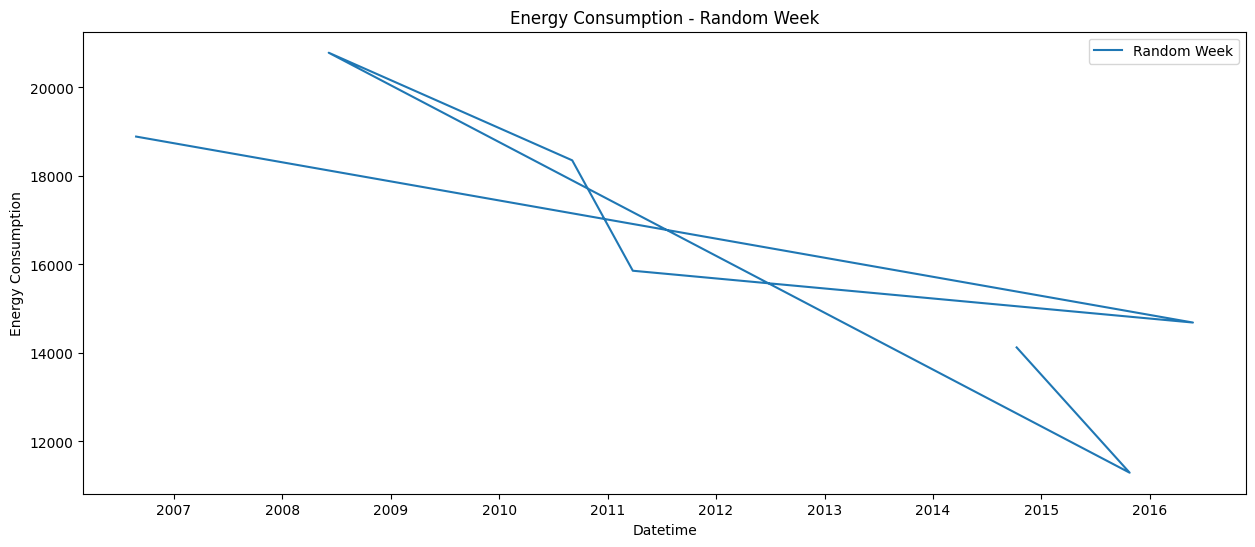

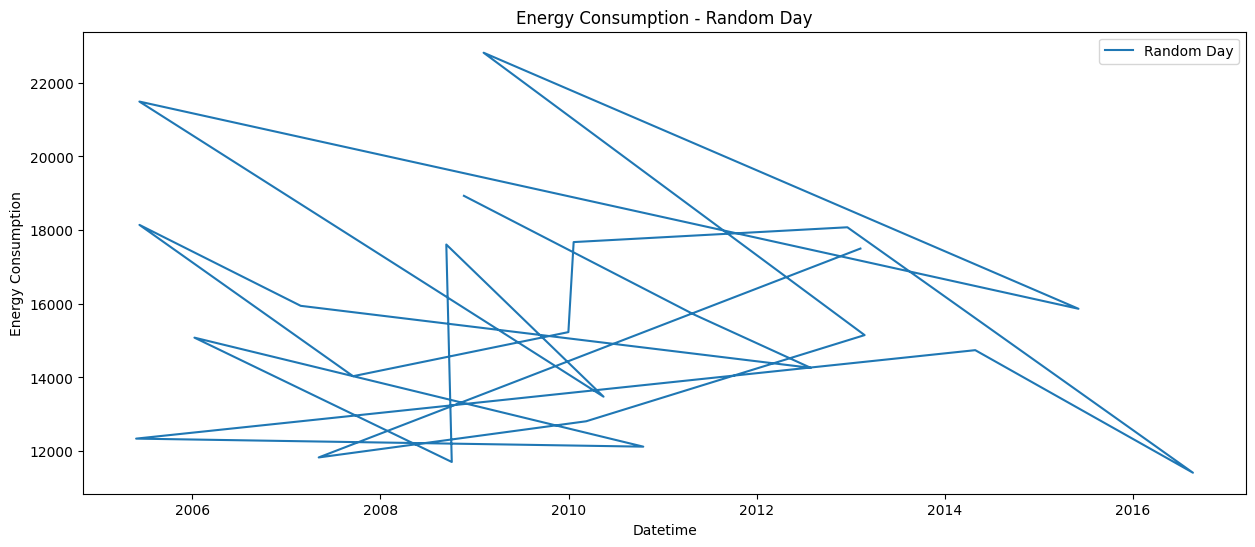

In [9]:
# Plot the random week
random_week = df.sample(7)  # Selecting a random week (7 days)
random_day = df.sample(24)  # Selecting a random day (24 hours)
plt.figure(figsize=(15, 6))
plt.plot(random_week.index, random_week['AEP_MW'], label='Random Week')
plt.title('Energy Consumption - Random Week')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

# Plot the random day
plt.figure(figsize=(15, 6))
plt.plot(random_day.index, random_day['AEP_MW'], label='Random Day')
plt.title('Energy Consumption - Random Day')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

## Model Creation andEestimation

Run a regression XGBoost model on the training and testing data-set. Take 1000 estimators and learnning rate as 0.01

In [15]:
import pandas as pd

# Assuming your DataFrame is named df
df['Datetime'] = pd.to_datetime(df['Datetime'])  # Convert to datetime
df['Month'] = df['Datetime'].dt.month
df['Time'] = df['Datetime'].dt.time

# If you also want to keep the date as a separate column
df['Day'] = df['Datetime'].dt.day


In [16]:
df.head()

,Datetime,AEP_MW,Month,Time,Date,Day
0,2004-12-31 01:00:00,13478.0,12,01:00:00,2004-12-31,31
1,2004-12-31 02:00:00,12865.0,12,02:00:00,2004-12-31,31
2,2004-12-31 03:00:00,12577.0,12,03:00:00,2004-12-31,31
3,2004-12-31 04:00:00,12517.0,12,04:00:00,2004-12-31,31
4,2004-12-31 05:00:00,12670.0,12,05:00:00,2004-12-31,31


In [17]:
df.drop('Datetime',axis=1,inplace=True)

In [29]:
df.drop('Time',axis=1,inplace=True)

Predict values for the testing set using the model and plot them

In [18]:
y=df['AEP_MW'].values

In [19]:
df.drop('AEP_MW',axis=1,inplace=True)

In [21]:
df.drop('Date',axis=1,inplace=True)

In [30]:
x=df.iloc[:,:].values

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [34]:
x_train[0]

array([11, 25])

In [35]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor()

# Train the regressor on the training data
xgb_regressor.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = xgb_regressor.predict(x_test)

Use RMSE to find out the accuracy of your model

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [37]:
rmse

2245.515804657868

Find the importance of each feature use